In [2]:
#All packages used
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sms

In [3]:
URL = 'https://github.com/Catarina00pinto/Project/raw/cbe1decf1c870fccbd5209e9a7a6a23a1b85b962/InfltnDF%20(1).xlsx'

In [4]:
#Now we are going to extract the excel file and read it
df=pd.read_excel(URL)
df

,Period,Goods,Services,Unprocessed foods,Energetic Prices,Global
0,01/1960,2.92,3.85,7.20,1.20,3.10
1,02/1960,3.96,2.71,10.21,1.19,3.73
2,03/1960,4.03,3.86,9.04,1.20,4.00
3,04/1960,3.67,5.12,7.75,1.20,3.94
4,05/1960,2.92,4.49,4.73,1.20,3.22
...,...,...,...,...,...,...
752,09/2022,11.93,5.33,16.89,22.23,9.28
753,10/2022,13.5,5.12,18.88,27.60,10.14
754,NaN,NaN,NaN,NaN,NaN,NaN
755,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Cleaning the data frame
def cleanData(df):
    df = df.drop(df.tail(3).index)
    return df

cleanData(df)
df = df.dropna()
df

,Period,Goods,Services,Unprocessed foods,Energetic Prices,Global
0,01/1960,2.92,3.85,7.20,1.20,3.10
1,02/1960,3.96,2.71,10.21,1.19,3.73
2,03/1960,4.03,3.86,9.04,1.20,4.00
3,04/1960,3.67,5.12,7.75,1.20,3.94
4,05/1960,2.92,4.49,4.73,1.20,3.22
...,...,...,...,...,...,...
749,06/2022,11.44,4.68,11.95,31.66,8.73
750,07/2022,11.83,4.93,13.22,31.18,9.06
751,08/2022,11.35,5.34,15.43,23.99,8.94
752,09/2022,11.93,5.33,16.89,22.23,9.28


## • Data analytics 

In [6]:
#same excel as the first one(df) in terms of values, but with different order
u = 'https://github.com/Catarina00pinto/Project/raw/main/InfltnDF.xlsx' 
df0=pd.read_excel(u)
cleanData(df0)
df0 = df0.dropna()
df0 = df0.drop(['Location'], axis = 1)

In [7]:
df0.describe()

,Goods,Services,Unprocessed foods,Energetic Prices,Global
count,754.000000,754.000000,754.000000,754.000000,754.000000
mean,7.457745,8.714973,8.325690,8.128753,7.858422
std,8.850213,7.076874,10.857357,10.705846,8.045711
min,-3.690000,-2.660000,-10.360000,-12.140000,-1.670000
25%,1.542500,2.930000,1.045000,0.882500,2.122500
50%,3.475000,5.995000,4.785000,4.630000,4.050000
75%,11.055000,14.177500,11.602500,11.922500,12.267500
max,38.170000,30.460000,63.670000,43.910000,36.660000


In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df0[['Goods','Services','Unprocessed foods','Energetic Prices']]#Indepedent Variables
Y = df0['Global']

vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 

# calculating Variance inflation factor for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
  
print(vif_data)
df0.corr()

#VIF measures the correlation and strength of correlation between the explanatory variables in a regression model.
#For values between 1 and 5 we can say that we have a moderate correlation between Global and the other explanatory variables.
#For values greater than 5 we can say that we have severe correlation between the Global variable and the other explanatory ones.

             feature        VIF
0              Goods  21.177314
1           Services   3.858091
2  Unprocessed foods   9.889775
3   Energetic Prices   5.410223


,Goods,Services,Unprocessed foods,Energetic Prices,Global
Goods,1.000000,0.745079,0.910109,0.829893,0.986937
Services,0.745079,1.000000,0.670751,0.561414,0.839132
Unprocessed foods,0.910109,0.670751,1.000000,0.697249,0.896505
Energetic Prices,0.829893,0.561414,0.697249,1.000000,0.808490
Global,0.986937,0.839132,0.896505,0.808490,1.000000


## • Time series

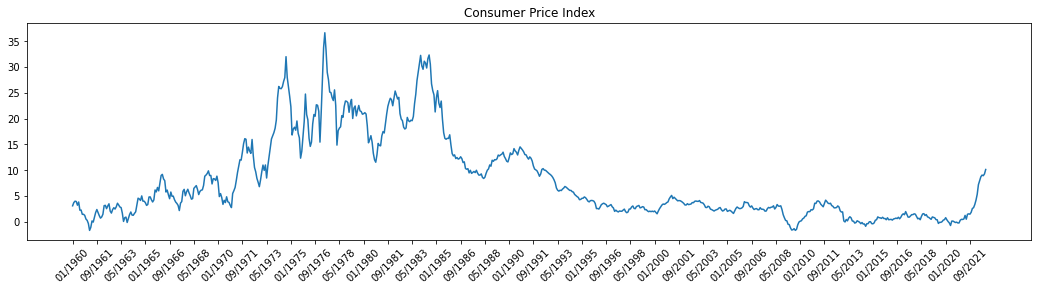

In [110]:
plt.figure(figsize=(18,4))
plt.plot(df['Global'], label='Index')

xlist, xlistL = [], []
for i in range(0, len(df['Period']), 20):
    xlist.append(i)
    xlistL.append(df['Period'][i])
    
plt.xticks(xlist, xlistL, rotation = 45)
plt.title('Consumer Price Index')
plt.show()

## • Correlation plots

In [9]:
df0.corr()

,Goods,Services,Unprocessed foods,Energetic Prices,Global
Goods,1.000000,0.745079,0.910109,0.829893,0.986937
Services,0.745079,1.000000,0.670751,0.561414,0.839132
Unprocessed foods,0.910109,0.670751,1.000000,0.697249,0.896505
Energetic Prices,0.829893,0.561414,0.697249,1.000000,0.808490
Global,0.986937,0.839132,0.896505,0.808490,1.000000


In [44]:
#Function for the correlation plots
def cor_plot(col):
    df.plot.scatter(x=col, y='Global')
    plt.show()

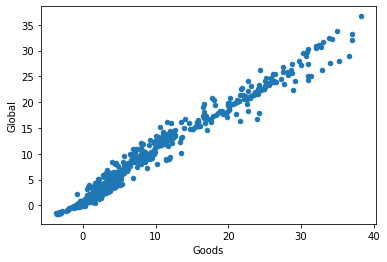

In [45]:
cor_plot('Goods')

#As we can observe, the ponits show an almost perfect correlation and also a positive tendency.

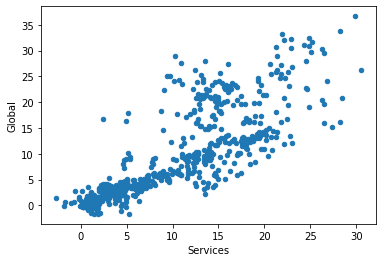

In [46]:
cor_plot('Services')

#As we can observe, the ponits are little dispersed, however it still shows a strong correlation with a positive tendecy.  

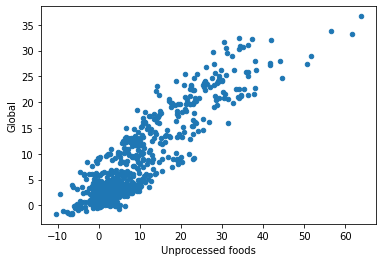

In [47]:
cor_plot('Unprocessed foods')
#As we can observe, the ponits show a strog correlation and also a positive tendency.

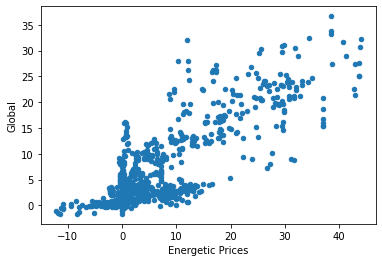

In [48]:
cor_plot('Energetic Prices')

#As we can observe, the ponits are wider distributed when compared with the previous graphs, nevertheless this also shows a strog correlation and also a positive tendency.

## • Plot the comparison of each independent variable with CPI

In [103]:
def plot_comp(col):
    Y = df['Global']
    y1 = df[col]

    plt.figure(figsize=(18,4))
    plt.plot(df['Period'], Y, label = "CPI")
    plt.plot(df['Period'], y1, label = col)
    
    xlist, xlistL = [], []
    for i in range(0, len(df['Period']), 20):
        xlist.append(i)
        xlistL.append(df['Period'][i])
    
    plt.xticks(xlist, xlistL, rotation = 45)
    plt.title("CPI vs "+ col )
    plt.legend()
    plt.show()

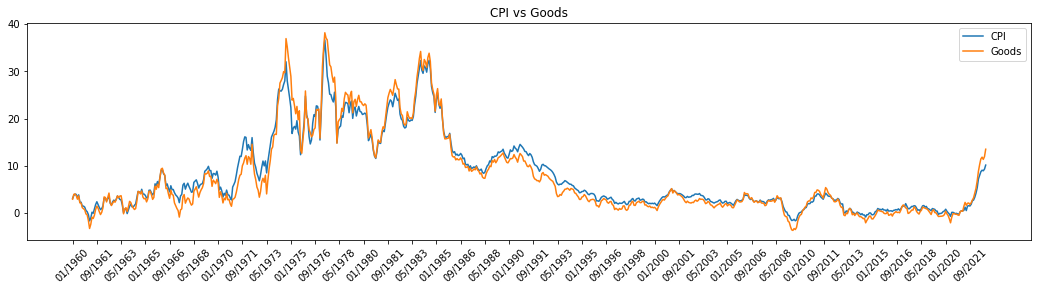

In [99]:
plot_comp('Goods')

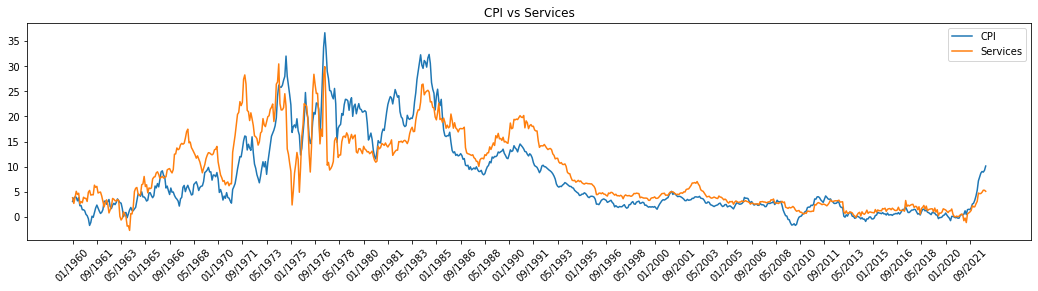

In [100]:
plot_comp('Services')

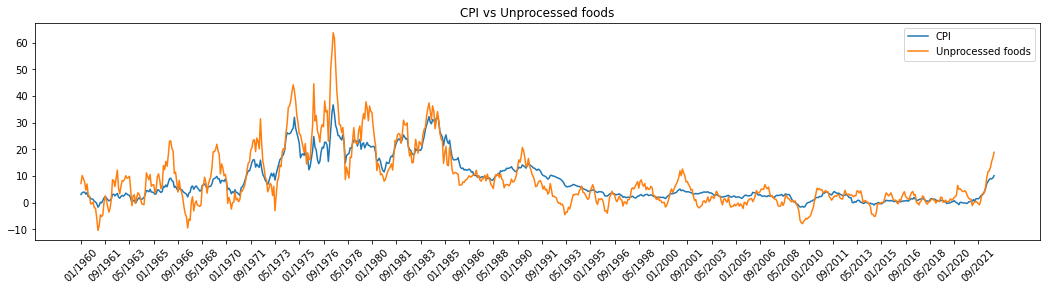

In [111]:
plot_comp('Unprocessed foods')

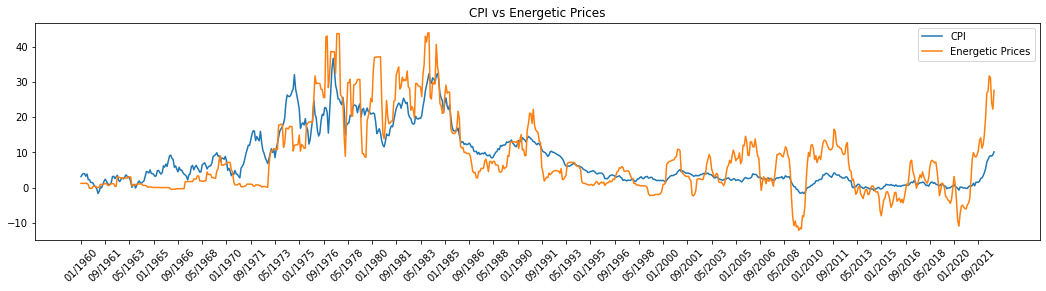

In [112]:
plot_comp('Energetic Prices')

# • Prediction Models (Energetic Prices)

## - OLS Model

In [54]:
X=np.array(df['Energetic Prices']).reshape(-1, 1)
Y=df['Global']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [55]:
model = LinearRegression()  
results=model.fit(X_train, y_train)  
y_test_pred=results.predict(X_test)
y_train_pred=results.predict(X_train)
print("R2 score (train) =", round(sm.r2_score(y_train, y_train_pred), 2))
print("R2 score (test) =", round(sm.r2_score(y_test, y_test_pred), 2))

R2 score (train) = 0.65
R2 score (test) = 0.68


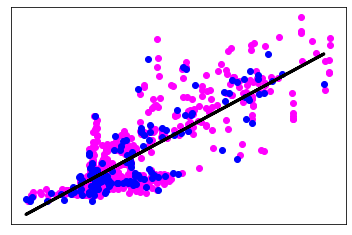

In [56]:
plt.scatter(X_train,y_train, color='magenta')
plt.scatter(X_test,y_test, color='blue') #prediction
plt.plot(X_test,y_test_pred, color='black',linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

## - MLP Model

In [57]:
model = MLPRegressor(random_state=1)  
results=model.fit(X_train, y_train)  
y_test_pred=results.predict(X_test)
y_train_pred=results.predict(X_train)
print("R2 score (train) =", round(sm.r2_score(y_train, y_train_pred), 2))
print("R2 score (test) =", round(sm.r2_score(y_test, y_test_pred), 2))

R2 score (train) = 0.65
R2 score (test) = 0.68


## - RandomForest Model

In [58]:
model = RandomForestRegressor()  
results=model.fit(X_train, y_train)  
y_test_pred=results.predict(X_test)
y_train_pred=results.predict(X_train)
print("R2 score (train) =", round(sm.r2_score(y_train, y_train_pred), 2))
print("R2 score (test) =", round(sm.r2_score(y_test, y_test_pred), 2))

R2 score (train) = 0.92
R2 score (test) = 0.57
